### Get our workspace ready

* Import Tensorflow 2.x
* Import Tensorflow Hub
* Not using GPU

In [1]:
# Import Necessary tools 
import tensorflow_hub as hub
import tensorflow as tf

print("TF version", tf.__version__)
print("TF Hub version", hub.__version__)

# Check for GPU availability
print("GPU", "availabe (YESSSSSSSSS!!!!)" if tf.config.list_physical_devices("GPU") else "not available")

2024-02-17 20:34:29.473320: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TF version 2.15.0
TF Hub version 0.16.1
GPU not available


### Getting our data ready (turning into tensors)
    
With all machine learning models, our data has to be in numerical format. So that's what we will be doing first. Turning our data into tensors

Let's start by accessing our data and checking out the labels

In [2]:
# Checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv("labels.csv")
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [3]:
labels_csv.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126

In [4]:
# How many labels are there for each breed

labels_csv['breed'].value_counts()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: count, Length: 120, dtype: int64

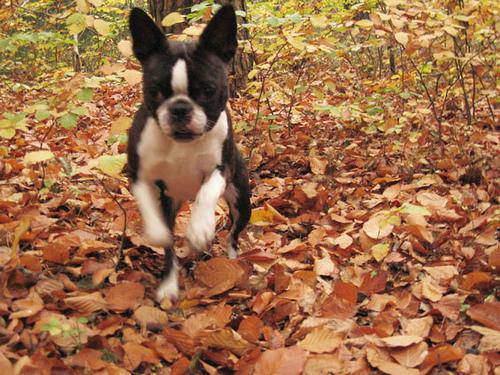

In [5]:
# Let's view an image
from IPython.display import Image
Image('train/000bec180eb18c7604dcecc8fe0dba07.jpg')

### Getting images and their labels

Let's get a list of all our image file pathnames

In [6]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [7]:
# Create pathnames from image ID's

filenames = ["train/"+fname+".jpg" for fname in labels_csv['id']]

# Check the first 10
filenames[:10]

['train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'train/001cdf01b096e06d78e9e5112d419397.jpg',
 'train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'train/002a283a315af96eaea0e28e7163b21b.jpg',
 'train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [8]:
# Check whether number of filenames matches number of actual image files

import os
if len(os.listdir('train/')) == len(filenames):
    print("Filenames match actual amount of files!!! Proceed.")
else:
    print("Filenames do not match")

Filenames match actual amount of files!!! Proceed.


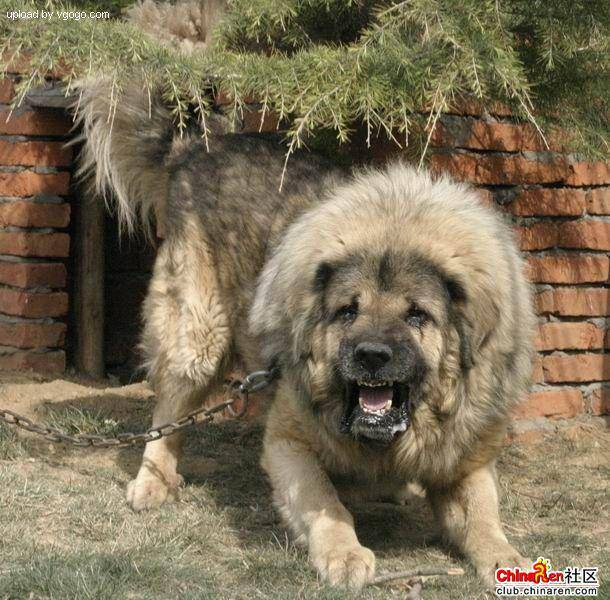

In [9]:
# One more check 
Image(filenames[9000])

In [10]:
labels_csv['breed'][9000]

'tibetan_mastiff'

Since we've now got our training image filepaths in a list, let's prepare our labels

In [11]:
import numpy as np
labels = labels_csv['breed']
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [12]:
len(labels)

10222

In [13]:
# See if number of labels matches number of filenames
if len(filenames) == len(labels):
    print("Number of labels match")
else:
    print("Number of labels does not match")

Number of labels match


In [14]:
# Find the unique label values
unique_breeds = np.unique(labels)
unique_breeds
len(unique_breeds)

120

In [15]:
# Turn a single label into an array of booleans 
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [16]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [17]:
 len(boolean_labels)

10222

In [18]:
# Example turning a boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [19]:
filenames[:10]

['train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'train/001cdf01b096e06d78e9e5112d419397.jpg',
 'train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'train/002a283a315af96eaea0e28e7163b21b.jpg',
 'train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [20]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

### Creating our own validation set 
Since the dataset from kaggle does not come with a validation set . We are going to create our own

In [21]:
# Setup X & y variables

X = filenames
y = boolean_labels


In [22]:
len(filenames)

10222

We're going to start off experimenting with ~1000 images and increases as needed

In [23]:
# Set number of images to use  for experimentng
NUM_IMAGES = 1000

In [24]:
# Lets split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

In [25]:
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [26]:
# Let's have a geez at the training data

X_train[:5], y_train[:2]

(['train/00bee065dcec471f26394855c5c2f3de.jpg',
  'train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, Fa

## Preprocessing images (turning images into tensors)

To preprocess our images into Tensors we're going to write a function which does a few things

1. Take image filepath as input
2. Use TF to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors (Convert our color channels from 0-255 to 0-1)
4. Resize the `image` to be a shape (224,224)
5. Return the modified `image`

before we do, let's see what importing an image looks like

In [27]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [28]:
image.max()

255

In [29]:
image.min()

0

In [30]:
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [31]:
# Turn image into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [32]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
    """
    Takes an image file path and turns the image into a Tensor
    """
    
    # Read in an image file 
    image = tf.io.read_file(image_path)
    
    # Turn the jpeg into numerical Tensor with 3 color channels (Red, Green , Blue)
    image = tf.image.decode_jpeg(image, channels=3)
    
    # Convert the color channel values from 0-255 to 0-1
    image = tf.image.convert_image_dtype(image, tf.float32)
    
    # Resize the image to our desired value (224,224)
    image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
    
    return image

In [33]:
tensor =  tf.io.read_file(filenames[26])
tensor

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01\xf4\x01w\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca

In [34]:
tensor = tf.image.decode_jpeg(tensor, channels=3)
tensor

<tf.Tensor: shape=(500, 375, 3), dtype=uint8, numpy=
array([[[ 59,  68,  65],
        [ 64,  73,  70],
        [ 71,  80,  77],
        ...,
        [115, 128, 108],
        [115, 128, 108],
        [110, 123, 103]],

       [[ 65,  74,  71],
        [ 72,  81,  78],
        [ 79,  88,  85],
        ...,
        [114, 127, 107],
        [117, 130, 110],
        [116, 129, 109]],

       [[ 68,  77,  74],
        [ 76,  85,  82],
        [ 83,  92,  89],
        ...,
        [114, 127, 107],
        [120, 133, 113],
        [123, 136, 116]],

       ...,

       [[173, 200, 155],
        [164, 179, 136],
        [181, 166, 133],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[142, 159, 117],
        [147, 154, 113],
        [189, 174, 141],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[167, 179, 139],
        [167, 172, 132],
        [204, 188, 155],
        ...,
        [255, 255, 25

In [35]:
tensor = tf.image.convert_image_dtype(tensor, tf.float32)
tensor

<tf.Tensor: shape=(500, 375, 3), dtype=float32, numpy=
array([[[0.23137257, 0.26666668, 0.25490198],
        [0.2509804 , 0.28627452, 0.27450982],
        [0.2784314 , 0.3137255 , 0.3019608 ],
        ...,
        [0.45098042, 0.5019608 , 0.42352945],
        [0.45098042, 0.5019608 , 0.42352945],
        [0.43137258, 0.48235297, 0.4039216 ]],

       [[0.25490198, 0.2901961 , 0.2784314 ],
        [0.28235295, 0.31764707, 0.30588236],
        [0.30980393, 0.34509805, 0.33333334],
        ...,
        [0.44705886, 0.49803925, 0.41960788],
        [0.45882356, 0.50980395, 0.43137258],
        [0.454902  , 0.5058824 , 0.427451  ]],

       [[0.26666668, 0.3019608 , 0.2901961 ],
        [0.29803923, 0.33333334, 0.32156864],
        [0.3254902 , 0.36078432, 0.34901962],
        ...,
        [0.44705886, 0.49803925, 0.41960788],
        [0.47058827, 0.52156866, 0.4431373 ],
        [0.48235297, 0.53333336, 0.454902  ]],

       ...,

       [[0.6784314 , 0.7843138 , 0.60784316],
        [0.64

## Turning our data into batches

Why turn our data into batches ?

Let's say you're trying to process 10,000+ images in one go ... they all might not fit into memory

So that's why we do about 32 (this is the batch size) images at a time (you can manually change the batch size)

In order to use TF effectively we need our data in the form of Tensor tuples which look like this:
`(image, label)` 

In [36]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
    """
    Takes an image file path name and the associated label, preprocesses the image and returns a type of (image, label).
    """
    image = process_image(image_path)
    return image, label

In [37]:
# Demo of the above
(process_image(X[42]),y[42] )

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117759],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we've got a way to turn our data into tuples of Tensors in the form : `(image, label)`, let's make a function to turn all of our data (`X` & `y`) into batches

In [38]:
# Define the batch size, 32 is a good size
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    """
    Creates batches of data out of image (X) and (y) pairs.
    Shuffles the data if it's training data but doesn't shuffle if it's validation data.
    Also accepts test data as input(no labels)
    """
    
    # If the data is a test dataset, we probably don't have labels
    if test_data:
        print("Creating test data batches")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # Only filepaths (no labels)
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch
    
    # If the data is the valid dataset we do not need to shuffle it
    elif valid_data:
        print("Creating validation data batches")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                                   tf.constant(y))) # labels
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch
    
    else:
        print("Creating training data batches")
        # Turn filepaths and labels into Tensors
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                  tf.constant(y)))
        # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
        data = data.shuffle(buffer_size=len(X))
        
        # Create (image, label) tuples (this also turns the image into a preprocessed image)
        data = data.map(get_image_label)
        
        data_batch = data.batch(BATCH_SIZE)
        
        return data_batch

In [39]:
# Create training and validation data rebatches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches
Creating validation data batches


In [40]:
# Check out the different attributes of the data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

Our data is in batches however, these can be a little hard to understand, let's visualize this

In [41]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images,labels):
    """
    Displays a plot of 25 images and their labels from a data batch
    """
    
    # Setup the figure
    plt.figure(figsize=(10,10))
    
    # Loop through 25 (for displaying 25 images)
    for i in range(25):
        # Create subplots (5 rows, 5 columns)
        ax = plt.subplot(5, 5, i+1)
        # Display an image
        plt.imshow(images[i])
        # Add the image label as the title
        plt.title(unique_breeds[labels[i].argmax()])
        # Turn the gridlines off
        plt.axis('off')
        

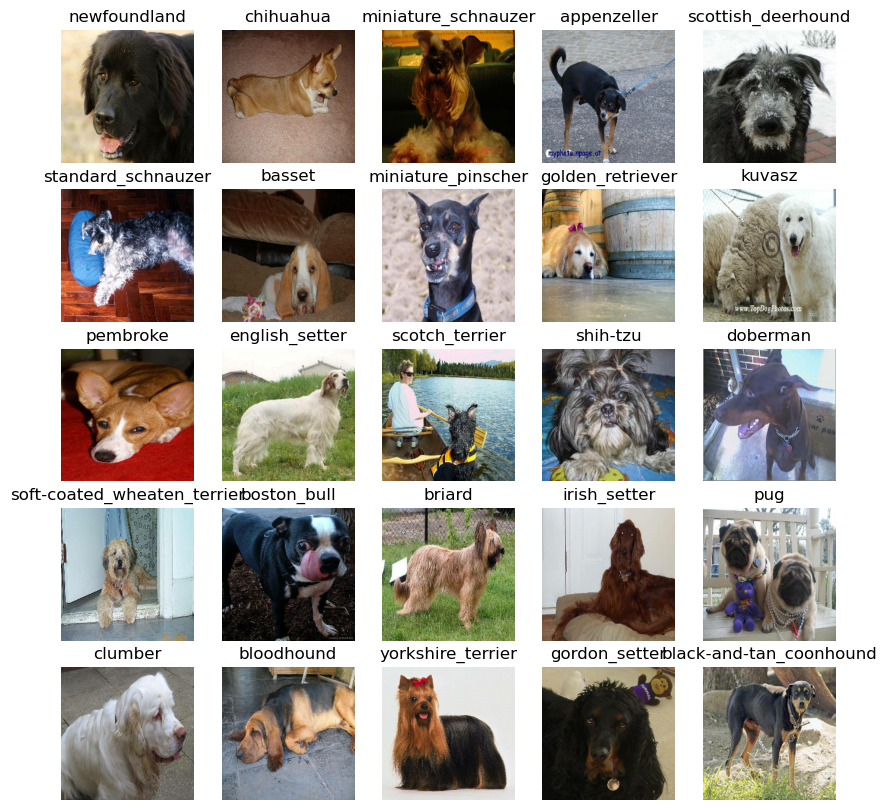

In [42]:
# Now let's visualize our data into a training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

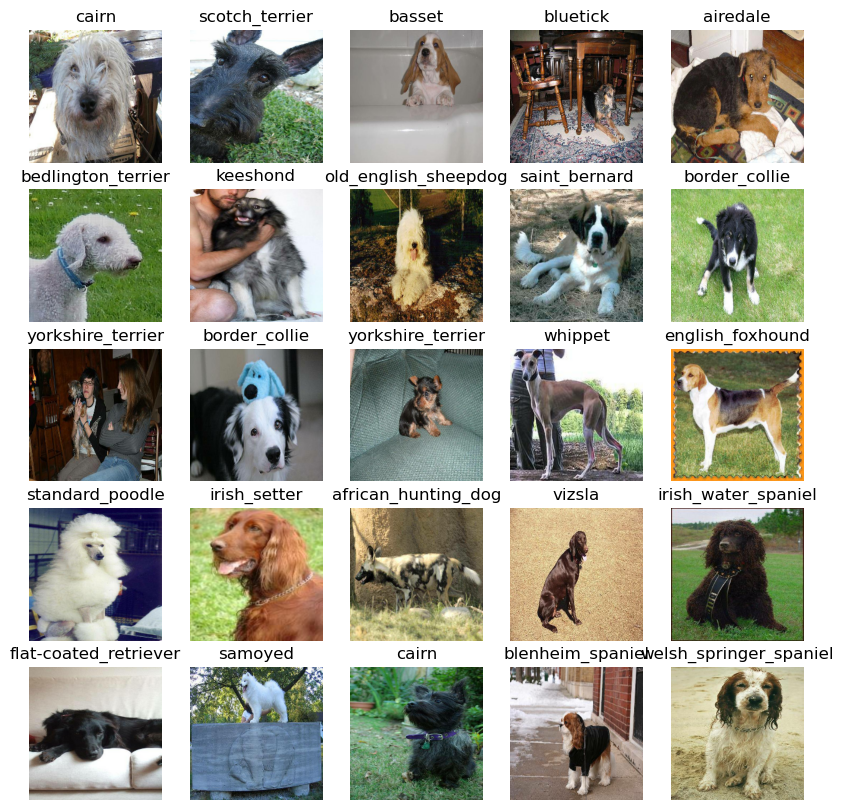

In [43]:
# Now let's visualize our validation set 
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a model

Before we build a model, there are few things we need to define:
* The `input` shape (our images shape, in the form of Tensors) to our model.
* The output shape(image labels, in the form of Tensors) of our model
* The URL of the model we want to use

In [44]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch , height , width, color channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup  mode URL from Tensorflow Hub
MODEL_URL = "https://kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/130-224-classification/versions/1"


Now we've got our inputs and outputs and model ready to go.
Let's put them together into a Keras deep learning model!

Knowing this, let's create a function which:
* Takes the input shape, output shape and the model we've chosen as parameters.
* Defines the layers in a Keras model in sequential fashion (do this first, then this, then that)
* Compiles the model (says it should be evaluated and improved)
* Builds the model (tells the model the input shape it'll be getting)
* Returns the model.

In [83]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    print("Building model with:", model_url)
    
    # Setup the model layers
    model = tf.keras.Sequential([
        tf.keras.layers.Lambda(lambda x: hub.KerasLayer(model_url)(x)),  # Layer 1
        tf.keras.layers.Dense(units=output_shape, activation="softmax")  # Output layer
    ])
    
    # Compile the model
    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=['accuracy']
    )

    # Build a model
    model.build(INPUT_SHAPE)
    
    return model


In [46]:
model = create_model()
model

Building model with: https://kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/130-224-classification/versions/1


<Sequential name=sequential, built=True>

In [47]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ lambda (Lambda)                 │ (None, 1001)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 120)               │    120,240 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 120,240 (469.69 KB)

 Trainable params: 120,240 (469.69 KB)

 Non-trainable params: 0 (0.00 B)

## Creating callback


Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training if a mmodel stops improving

We'll create 2 callbacks, one for Tensorboard which helps track our models progress and other for early stopping which prevent our model from training for too long

### Tensorboard Callback

To setup a tensorboard callback we need to do 3 things:

1. Load the Tensorboard notebook extension
2. Create a Tensorboard callback which is able to save logs to a directory and pass it to our model's `fit()` function.
3. Visualize our models training logs with the `%tensorboard` magic function (we'll do after model training)

In [48]:
# Load Tensorboard notebook extension
%load_ext tensorboard

In [49]:
import datetime

# Create a function to build a Tensorboard callback
def create_tensorboard_callback():
    # Create a log directory for strong TensorBoard logs
    logdir = os.path.join('logs/',
                         datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    
    return tf.keras.callbacks.TensorBoard(logdir)
    

### Early stopping callback

Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops



In [50]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                 patience=3)


## Training a model (on subset of data)

We are going to train on 1000 images

In [51]:
NUM_EPOCHS = 100

Let's create a simple function which trains a model.

* Create a model using `create_model()`
* Setup a Tensorboard callback using `create_tensorboard_callback()`
* Call the `fit()` function on our model passing it the training data, validation data, number of epochs to train for `(NUM_EPOCHS)` and the callbacks we'd like to use
* Return the model

In [52]:
# Build a function to train and return a trained model
def train_model():
    """
    Trains a given model and returns the trained version
    """
    
    # Create a model
    model = create_model()
    
    # Create new TensorBoard session everytime we train a model
    tensorboard = create_tensorboard_callback()
    
    # Fit the model to the training data
    model.fit(x=train_data,
             epochs=NUM_EPOCHS,
             validation_data=val_data,
             validation_freq=1,
             callbacks=[tensorboard, early_stopping])
    
    return model

In [53]:
# Fit the model to the data
model = train_model()

Building model with: https://kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/130-224-classification/versions/1
Epoch 1/100


2024-02-18 16:07:31.467094: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 231211008 exceeds 10% of free system memory.


 1/25 ━━━━━━━━━━━━━━━━━━━━ 469:04:02 70360s/step - accuracy: 0.0312 - loss: 5.6324

2024-02-18 16:07:32.386449: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 231211008 exceeds 10% of free system memory.


 2/25 ━━━━━━━━━━━━━━━━━━━━ 17s 760ms/step - accuracy: 0.0391 - loss: 5.6015       

2024-02-18 16:07:33.146393: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 231211008 exceeds 10% of free system memory.


 3/25 ━━━━━━━━━━━━━━━━━━━━ 16s 755ms/step - accuracy: 0.0399 - loss: 5.6227

2024-02-18 16:07:33.896259: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 231211008 exceeds 10% of free system memory.


 4/25 ━━━━━━━━━━━━━━━━━━━━ 15s 747ms/step - accuracy: 0.0378 - loss: 5.6162

2024-02-18 16:07:34.628456: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 231211008 exceeds 10% of free system memory.


25/25 ━━━━━━━━━━━━━━━━━━━━ 70391s 1s/step - accuracy: 0.0616 - loss: 5.0998 - val_accuracy: 0.2600 - val_loss: 3.2820
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.6311 - loss: 1.8882 - val_accuracy: 0.5000 - val_loss: 2.0937
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9219 - loss: 0.6320 - val_accuracy: 0.5650 - val_loss: 1.6489
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.9906 - loss: 0.2802 - val_accuracy: 0.6050 - val_loss: 1.4791
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.9983 - loss: 0.1438 - val_accuracy: 0.6100 - val_loss: 1.4264
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.9977 - loss: 0.1141 - val_accuracy: 0.6200 - val_loss: 1.3772
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 1.0000 - loss: 0.0783 - val_accuracy: 0.6200 - val_loss: 1.3547
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 1.0000 - loss: 0.0579 - val_accuracy: 0.6300 - val_loss: 

### Checking the Tensorboard logs


The Tensorboard magic function `(%tensorboard)` will access the logs directory we created and visualize its content

In [54]:
%tensorboard  --logdir logs/

## Making and evaluating predictions using a trained model

In [55]:
# Make predictions on validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step


array([[1.2122976e-03, 6.0092170e-05, 9.1319308e-03, ..., 1.6828967e-04,
        2.0289843e-05, 3.6749109e-03],
       [8.2360930e-04, 4.7657237e-04, 3.6861941e-03, ..., 6.3368306e-04,
        1.2289282e-03, 4.0418643e-05],
       [6.1259052e-05, 7.5681121e-05, 2.3303390e-05, ..., 1.5099553e-04,
        1.1609536e-04, 2.6314129e-04],
       ...,
       [1.2275562e-05, 1.9938663e-05, 1.5076487e-06, ..., 9.5551222e-06,
        2.2622239e-04, 3.0141964e-05],
       [6.5494404e-04, 6.1700368e-05, 7.5167045e-05, ..., 4.5205059e-05,
        4.2741717e-06, 6.2097684e-03],
       [7.0390693e-04, 1.1451133e-05, 2.0049526e-03, ..., 3.4529308e-03,
        1.5016122e-03, 1.4085235e-04]], dtype=float32)

In [56]:
predictions.shape

(200, 120)

In [57]:
# First prediction
index = 42
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Prediction label: {unique_breeds[np.argmax(predictions[index])]}")

[8.78334220e-04 7.94728476e-05 5.35166328e-05 6.08356422e-05
 4.86097904e-03 1.02491547e-04 2.14250555e-04 1.05545449e-03
 8.98303185e-03 1.01645924e-01 4.10794528e-05 5.46264346e-06
 1.81055657e-04 8.78679845e-03 1.83375611e-03 4.95366333e-03
 5.82438624e-05 8.95867066e-04 5.72495701e-05 5.08132915e-04
 1.09992670e-05 1.16398663e-03 3.73551084e-05 9.05074558e-06
 2.23338418e-02 1.75521796e-04 2.52584898e-04 8.24643794e-05
 1.48946521e-04 1.13089176e-04 1.26385290e-04 3.74089228e-04
 5.32849153e-05 1.92924359e-04 3.24089051e-04 3.32653144e-05
 2.04317868e-04 2.96461949e-04 4.84077609e-05 1.57241195e-01
 1.46043487e-03 1.58366718e-04 4.36407812e-02 1.09853981e-05
 4.34674701e-04 8.71885859e-05 1.13963979e-04 1.80853414e-03
 9.87055100e-05 5.75292681e-04 1.26659434e-04 8.23530936e-05
 8.07925651e-04 1.39524438e-03 3.96694631e-05 1.00682687e-03
 2.17973240e-04 1.77048816e-04 2.01346164e-04 2.00808936e-05
 4.42419041e-05 1.88689062e-03 1.41817136e-05 2.85557617e-05
 1.75687441e-04 5.188286

Having the above functionality is great but we want to be able to do it at a scale

And it would be even better if we could see the image the prediction is being made on!

#### Note Prediction probabilities are also know as confidence levels

In [58]:
# Turn prediction probablities into their respective label (easier to understand)
def get_pred_label(prediction_probs):
    """
    Turns an array of probabilities into a label
    """
    return unique_breeds[np.argmax(prediction_probs)]

# Get a predicted label based on  an array of prediction probabilities
pred_label = get_pred_label(predictions[81])
pred_label

'dingo'

In [59]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

Now since our validation data is still in a batch dataset,
we'll have to remove batches for it to make predicitions on the validation images and then compare those predictions to the validation labels(truth labels)

In [60]:
def unbatchify(data):
    """
    Takes a batch dataset of (image, label) Tensors and returns separate arrays of images and labels.
    """
    
    images = []
    labels = []
    
    # Loop thru unbatched data
    for image, label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_breeds[np.argmax(label)])
    return images, labels

# Unbatchify the validation data
val_images , val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [61]:
val_labels

['cairn',
 'scotch_terrier',
 'basset',
 'bluetick',
 'airedale',
 'bedlington_terrier',
 'keeshond',
 'old_english_sheepdog',
 'saint_bernard',
 'border_collie',
 'yorkshire_terrier',
 'border_collie',
 'yorkshire_terrier',
 'whippet',
 'english_foxhound',
 'standard_poodle',
 'irish_setter',
 'african_hunting_dog',
 'vizsla',
 'irish_water_spaniel',
 'flat-coated_retriever',
 'samoyed',
 'cairn',
 'blenheim_spaniel',
 'welsh_springer_spaniel',
 'scottish_deerhound',
 'komondor',
 'norwich_terrier',
 'cardigan',
 'dingo',
 'dandie_dinmont',
 'walker_hound',
 'walker_hound',
 'mexican_hairless',
 'eskimo_dog',
 'siberian_husky',
 'welsh_springer_spaniel',
 'doberman',
 'mexican_hairless',
 'kuvasz',
 'labrador_retriever',
 'wire-haired_fox_terrier',
 'english_foxhound',
 'collie',
 'toy_poodle',
 'groenendael',
 'boston_bull',
 'standard_poodle',
 'miniature_poodle',
 'chihuahua',
 'staffordshire_bullterrier',
 'vizsla',
 'norfolk_terrier',
 'pug',
 'bedlington_terrier',
 'affenpinsche

Now we've got ways to get :

* Prediction labels
* Validation labels (truth labels)
* Validation images

Let's make some function to make these all a bit a more visualize

We'll create a function which:

* Takes an array of prediction probabilities, an array of truth labels and an array of images and integers
* Convert the prediciton probabilities to a predicted label.
* Plot the predicted label, its predicted probability, the truth label and the target image on a single plot

In [62]:
def plot_pred(prediction_probs, labels, images, n=1):
    """
    View the prediction, ground truth and image of sample n
    """
    pred_prob, true_label, image = prediction_probs[n], labels[n], images[n]
    
    # Get pred label
    pred_label = get_pred_label(pred_prob)
    
    # Plot image & remove ticks
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    
    # Change the color of the title depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"
    
    
    # Change plot title to be predicted, probability of prediction and truth label
    plt.title("{} {:2.0f}% {}".format(
                            pred_label,
                            np.max(pred_prob)*100,
                            true_label),
                            color=color)
              

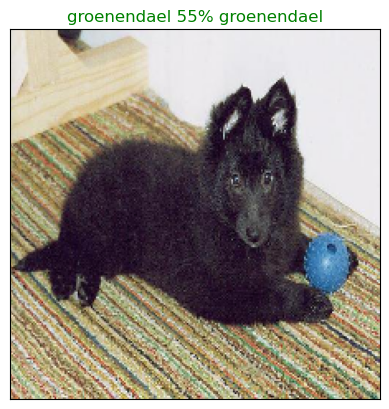

In [63]:
plot_pred(prediction_probs=predictions, 
         labels=val_labels,
         images=val_images,
         n=77)

Now we've got one function to visualize our top model prediction, let's make another to view our models top 10 predictions

This function will:
    
* Take an `input`of prediction probabilites array and a ground truth array and an integer
* Find the prediction using `get_pred_label()`
* Find the top 10:
    * Prediction probabilities indexes
    * Prediction probabilites values
    * Prediction labels
* Plot the top 10 prediction probability values and labels, coloring the true label green

In [67]:
def plot_pred_conf(prediction_probs, labels, n=1):
    """
    Plus the top 10 highest prediction confidences along with the truth label for sample n.
    """
    
    pred_prob, true_label = prediction_probs[n], labels[n]
    
    # Get the pred label
    pred_label = get_pred_label(pred_prob)
    
    # Find the top 10 prediction confidence indexes
    top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
    
    # Find the top 10 confidence values
    top_10_pred_values = pred_prob[top_10_pred_indexes]
    
    # Find the top 10 prediction labels
    top_10_pred_labels = unique_breeds[top_10_pred_indexes]
    
    # Setup a plot
    top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                      top_10_pred_values,
                      color="grey")
    plt.xticks(np.arange(len(top_10_pred_labels)),
              labels=top_10_pred_labels,
              rotation="vertical")
    
    # Change the color of the true label
    if np.isin(true_label, top_10_pred_labels):
        top_plot[np.argmax(top_10_pred_labels == true_label)].set_color('green')
    else:
        pass

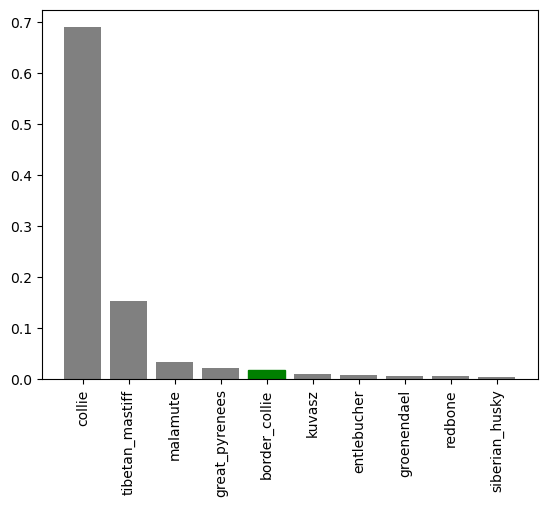

In [68]:
plot_pred_conf(prediction_probs=predictions,
              labels=val_labels,
              n=9)

Now we've got some function to help us visualize our predictions and evaluate our model, let's check out a few.

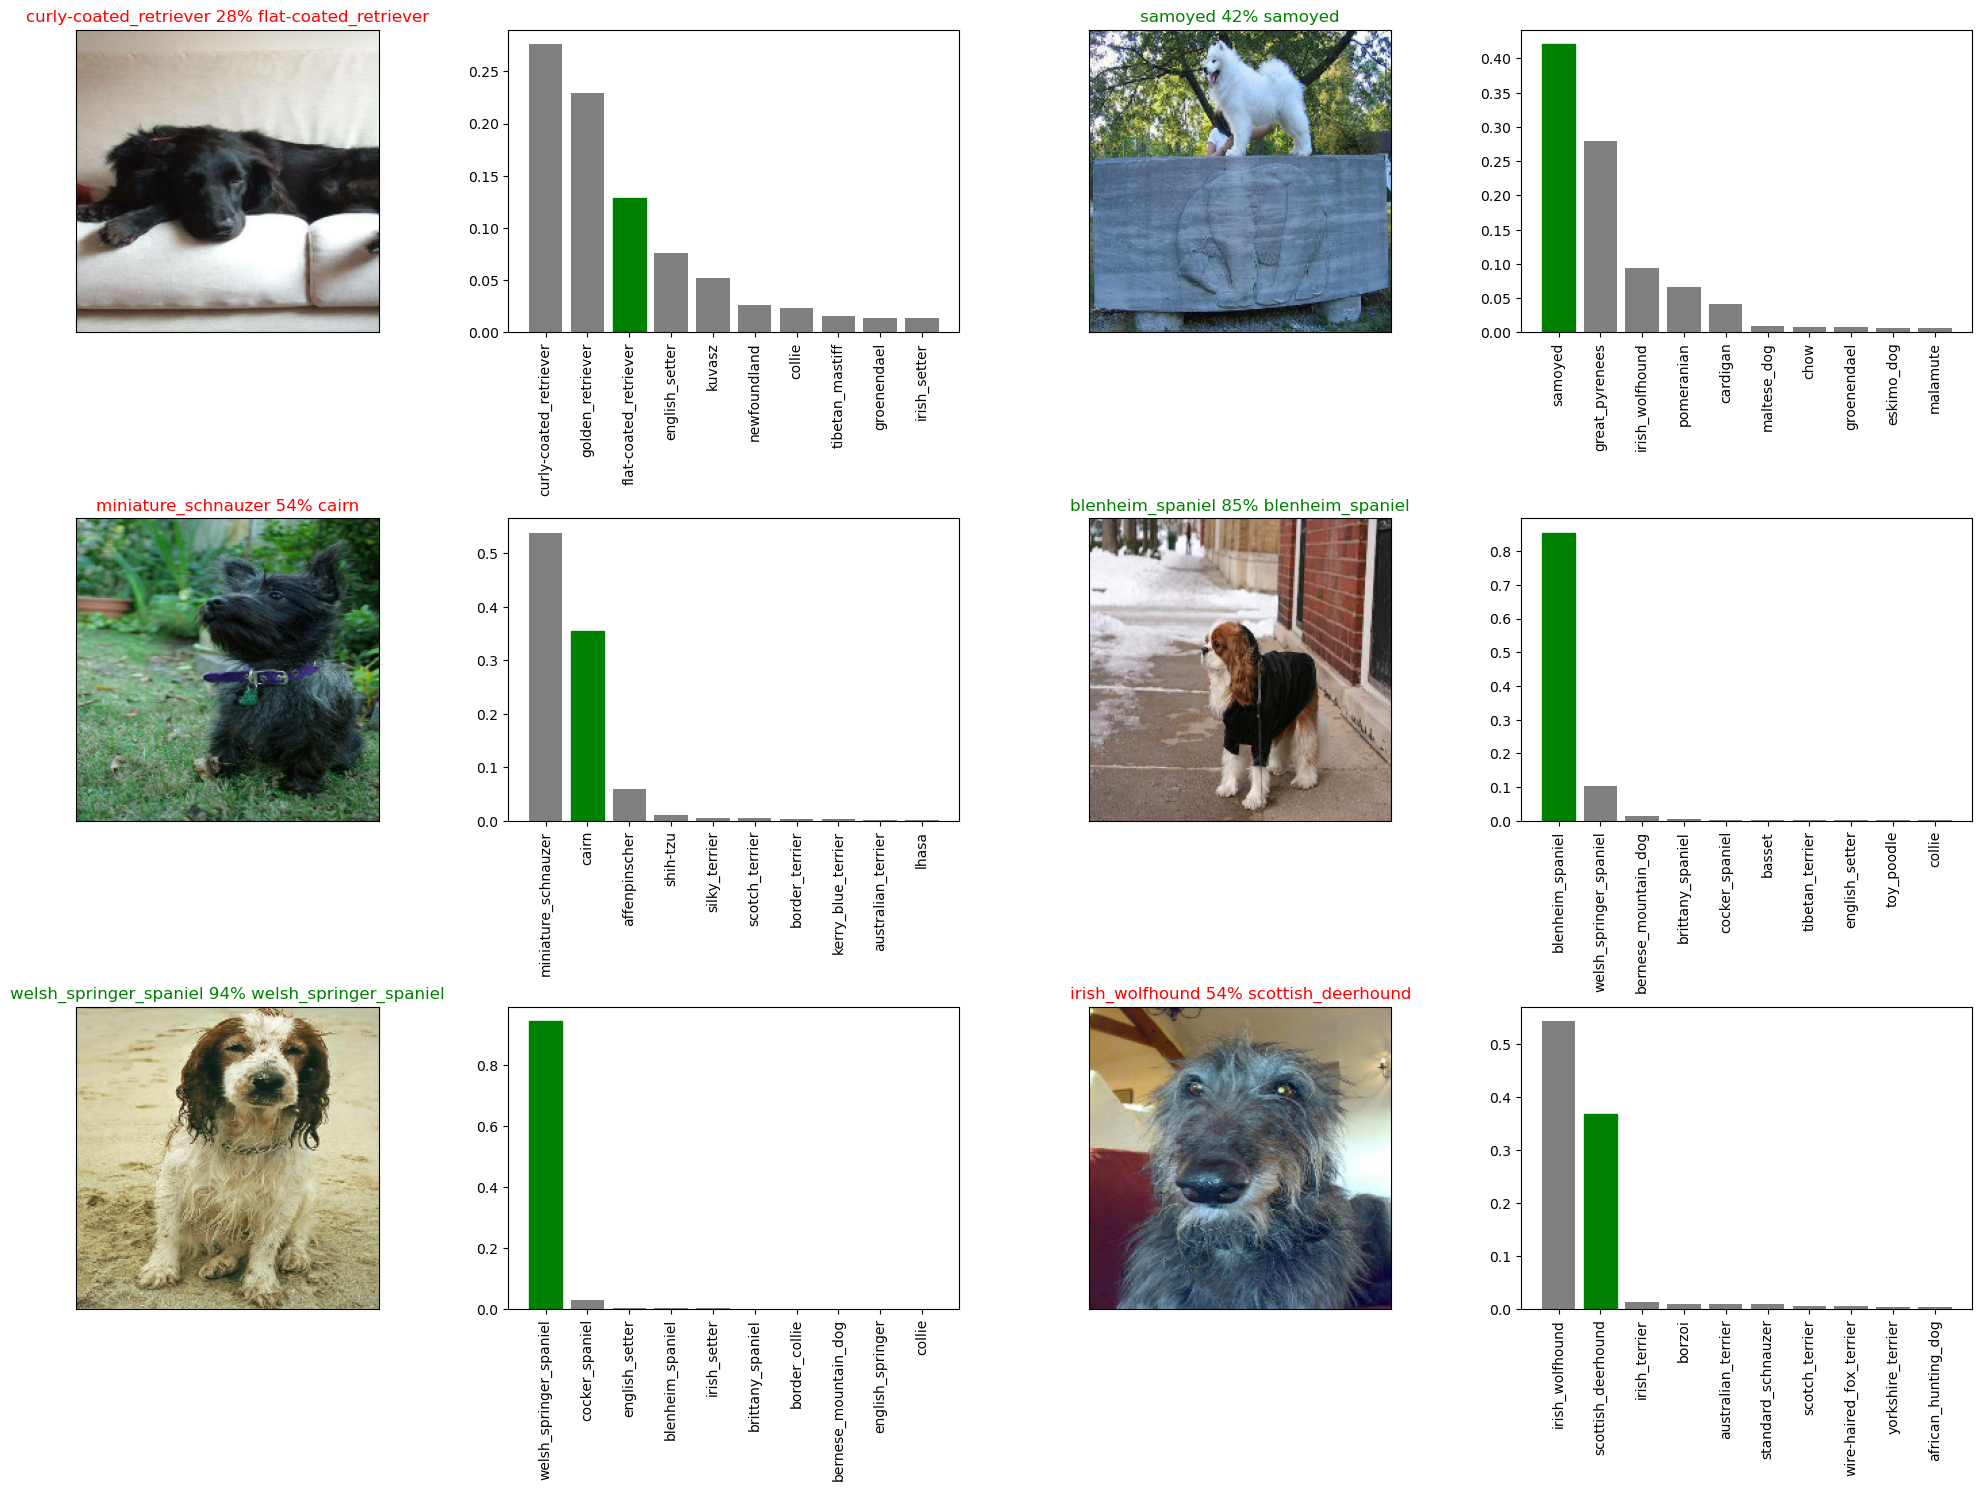

In [76]:
# Let's check out a few predictions and their different values
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=((10*num_cols), (5*num_rows)))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_pred(prediction_probs=predictions, labels=val_labels, images=val_images, n=i+i_multiplier)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_pred_conf(prediction_probs=predictions,
                  labels=val_labels,
                  n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()
    

## Saving and reloading a trained model

In [90]:
# Create a function to save a model
def save_model(model, suffix=None):
    """
    Save a given model in a models directory and appends a suffix string
    """
    
    # Create a model directory pathname with current time
    modeldir = os.path.join('models/', datetime.datetime.now().strftime('%Y%m%m-%H%M%s'))
    model_path = modeldir + "-" + suffix + ".h5" # save format of model
    print(f"Saving model to {model_path}...")
    model.save(model_path)
    return model_path

# Create a function to load a trained model
def load_model(model_path, input_shape=(224, 224, 3)):
    """
    Loads a saved model from specified path
    """
    
    print(f"Loading saved model from {model_path}")
    model = tf.keras.models.load_model(model_path)  # Set compile=False to avoid compilation issues
    return model

    

Now we've got functions to save and reload model make sure it works

In [91]:
# save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving model to models/20240202-18021708272152-1000-images-mobilenetv2-Adam.h5...


'models/20240202-18021708272152-1000-images-mobilenetv2-Adam.h5'

Loading saved model from models/20240202-18021708272152-1000-images-mobilenetv2-Adam.h5


ValueError: Sequential model 'sequential_1' has already been configured to use input shape (None, 224, 224, 3). You cannot build it with input_shape [None, 224, 224, 3]

<function __main__.load_model(model_path)>